# BELAJAR MACHINE LEARNING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Data sets\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [19]:
tiga_kolom_terakhir = df.iloc[:, -2:]

print(tiga_kolom_terakhir)

     reading score  writing score
0               72             74
1               90             88
2               95             93
3               57             44
4               78             75
..             ...            ...
995             99             95
996             55             55
997             71             65
998             78             77
999             86             86

[1000 rows x 2 columns]


In [20]:
tiga_kolom_terakhir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   reading score  1000 non-null   int64
 1   writing score  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


# K-Means Clustering

In [21]:
from sklearn.metrics import silhouette_score

X = tiga_kolom_terakhir
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

# Menghitung nilai silhouette score untuk model clustering
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4483972441728672


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


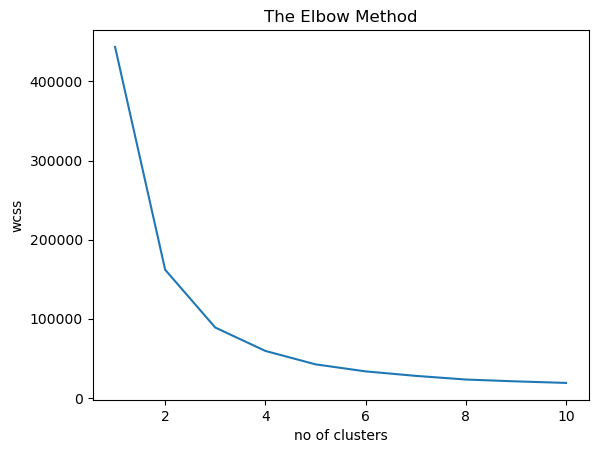

In [22]:

# Inisialisasi daftar kosong untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares)
wcss = []

# Menggunakan loop untuk menghitung WCSS untuk jumlah cluster 1 sampai 10
for i in range(1, 11):
    # Membuat objek KMeans dengan jumlah cluster 'i' dan inisialisasi 'k-means++' untuk mengoptimalkan titik awal
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    
    # Melakukan fitting KMeans dengan data X (Annual Income dan Spending Score)
    kmeans.fit(X)
    
    # Menyimpan nilai inertia (nilai WCSS) dari hasil clustering
    wcss.append(kmeans.inertia_)

# Membuat plot untuk menampilkan hasil WCSS untuk berbagai jumlah cluster
plt.plot(range(1, 11), wcss)  # Plot jumlah cluster (x-axis) vs WCSS (y-axis)
plt.title('The Elbow Method')  # Judul grafik
plt.xlabel('no of clusters')   # Label untuk sumbu x (jumlah cluster)
plt.ylabel('wcss')             # Label untuk sumbu y (Within-Cluster Sum of Squares)
plt.show()  # Menampilkan plot

In [49]:
from sklearn.cluster import KMeans

# n_clusters = Jumlah cluster
# 'random_stat digunakan agar hasil bisa direproduksi
kmeansmodel = KMeans(n_clusters=3, init='k-means++', random_state=0)

# Fungsi fit_predict() memproses clustering dan mengembalikan label cluster untuk setiap data point
y_kmeans = kmeansmodel.fit_predict(X)

In [47]:
from sklearn.metrics import silhouette_score

# Menghitung nilai silhouette score untuk model clustering
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.48705942381967815


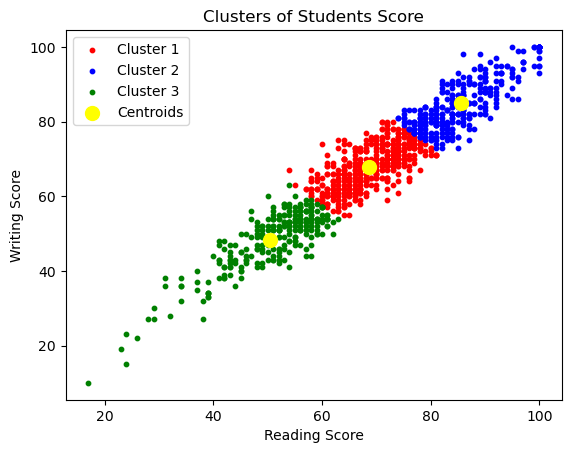

In [43]:
# Memvisualisasikan titik-titik data untuk setiap cluster

# Cluster 1: Menampilkan data yang masuk dalam cluster 1 (ditandai dengan warna merah)
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Cluster 2: Menampilkan data yang masuk dalam cluster 2 (ditandai dengan warna biru)
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')

# Cluster 3: Menampilkan data yang masuk dalam cluster 3 (ditandai dengan warna hijau)
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')


# Menampilkan titik centroid untuk setiap cluster (ditandai dengan warna kuning dan ukuran lebih besar)
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

# Memberikan judul pada grafik
plt.title('Clusters of Students Score')

# Menyediakan label untuk sumbu X.iloc (Pendapatan Tahunan dalam ribuan dolar)
plt.xlabel('Reading Score')

# Menyediakan label untuk sumbu Y (Skor Pengeluaran dari 1-100)
plt.ylabel('Writing Score')

# Menampilkan legenda untuk membantu memahami setiap warna yang mewakili cluster
plt.legend()

# Menampilkan grafik yang sudah dihasilkan
plt.show()

In [36]:
X

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75
...,...,...
995,99,95
996,55,55
997,71,65
998,78,77
